# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
# %pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib scikit-image 
#imgaug

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-04-13 02:46:30.960320: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 02:46:30.970093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744505190.981945  510786 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744505190.985425  510786 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 02:46:30.997320: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import torch
import numpy as np
import pandas as pd
import sys

In [4]:
from managers.FrameLoader import FrameLoader
from managers.DataRepository import DataRepository
from helpers import plot

In [5]:
import os
import psutil

def process_memory():
    "Returns megabytes"
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024 / 1024 / 1024

print(f"Current memory usage: {process_memory()} gigabytes")

Current memory usage: 0.9072494506835938 gigabytes


In [6]:
repo = DataRepository()
repo.VideoNames.head()

connection established, loading frame paths
relative paths of framelabels loaded


,folderId,id,name
id,,,
2214,16,2214,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
2215,16,2215,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
1084,5,1084,competition/belgium/SR1/2011-brewsterbayside-s...
1085,5,1085,competition/belgium/SR1/2011-brewsterbayside-s...
1086,5,1086,competition/belgium/SR1/2011-brewsterbayside-s...


In [7]:
frameloader = FrameLoader(repo)

In [8]:
repo.VideoNames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 2214 to 575
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   folderId  1913 non-null   int64 
 1   id        1913 non-null   int64 
 2   name      1913 non-null   object
dtypes: int64(2), object(1)
memory usage: 59.8+ KB


In [9]:
repo.VideoNames.loc[1319]["name"]

'competition/belgium/DD3/2024-dd3-sipiro-senioren-maud-pkb-j1.mp4'

In [10]:
from managers.DataGeneratorSkillsTorch import DataGeneratorSkills

In [11]:
%%time

train_gen = DataGeneratorSkills(
    frameloader=frameloader,
    train_test_val="train",
    dim=(224,224),
    batch_size=1
)


connection established, loading frame paths
relative paths of framelabels loaded
skillcounts    skills  types  turners
0      30      6       26
skill
1     2273
3      631
2      586
4      442
7      144
5       90
15      50
11      41
10      40
20      36
12      33
17      31
13      20
25      16
14      14
18      12
23       8
30       6
8        6
19       3
24       2
26       1
9        1
Name: count, dtype: int64
90
DataGeneratorSkills init done
skill
1     2273
3      631
2      586
4      442
7      144
5       90
15      50
11      41
10      40
20      36
12      33
17      31
13      20
25      16
14      14
18      12
23       8
30       6
8        6
19       3
24       2
26       1
9        1
Name: count, dtype: int64
90
CPU times: user 2.98 s, sys: 112 ms, total: 3.09 s
Wall time: 3.82 s


In [12]:
X, y = train_gen.__getitem__(1, normalize=False)
X.shape

1319
ok
/media/miked/Elements/Judge/FINISHED-DB-READY/cropped-videos/OK/224_1319.mp4
True 517.0
frames per timestep 0.875 530 s = 516 16
516 0 curr 516 pos 517
516.875 1 curr 517 pos 517
517.75 2 curr 518 pos 517
517.75 2 curr 518 pos 518
518.625 3 curr 519 pos 518
518.625 3 curr 519 pos 519
519.5 4 curr 520 pos 519
519.5 4 curr 520 pos 520
520.375 5 curr 520 pos 520
521.25 6 curr 521 pos 520
521.25 6 curr 521 pos 521
522.125 7 curr 522 pos 521
522.125 7 curr 522 pos 522
523.0 8 curr 523 pos 522
523.0 8 curr 523 pos 523
523.875 9 curr 524 pos 523
523.875 9 curr 524 pos 524
524.75 10 curr 525 pos 524
524.75 10 curr 525 pos 525
525.625 11 curr 526 pos 525
525.625 11 curr 526 pos 526
526.5 12 curr 526 pos 526
527.375 13 curr 527 pos 526
527.375 13 curr 527 pos 527
528.25 14 curr 528 pos 527
528.25 14 curr 528 pos 528
529.125 15 curr 529 pos 528
529.125 15 curr 529 pos 529


torch.Size([16, 3, 224, 224])

In [13]:
y

{'Type': tensor(0),
 'Rotations': tensor(0.1250),
 'Turner1': tensor(0),
 'Turner2': tensor(0),
 'Skill': tensor(0),
 'Hands': tensor(0.),
 'Feet': tensor(1.),
 'Turntable': tensor(0.),
 'BodyRotations': tensor(0.),
 'Backwards': tensor(0.),
 'Sloppy': tensor(0.),
 'Hard2see': tensor(0.),
 'Fault': tensor(0.)}

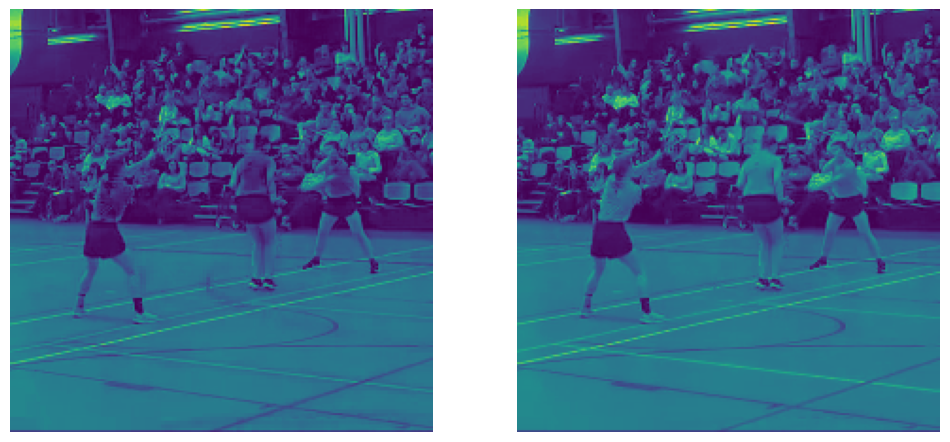

In [14]:
for j in range(X.shape[1]//2):
    plot(X[0, j*2:j*2+2])
